There are 12 months on Mars.
There are 1867 Martian sols in the dataset.


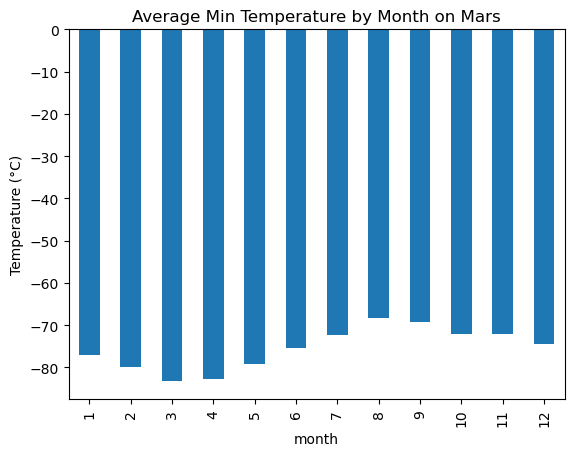

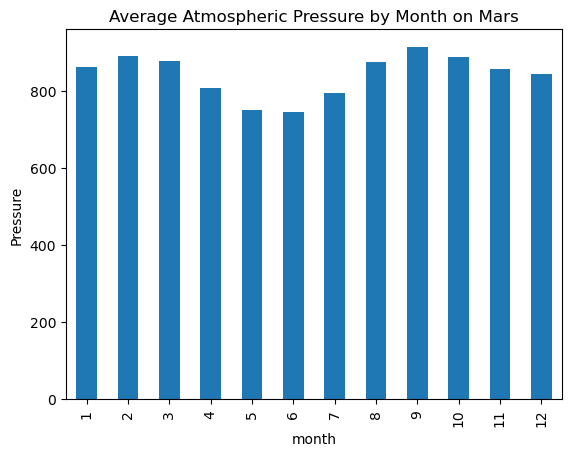

In [1]:
# Import dependencies
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# URL of the Mars weather data
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

# Get the content of the page
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table
table = soup.find('table')

# Extract headers
headers = []
for th in table.find_all('th'):
    headers.append(th.text)

# Extract rows of data
rows = []
for tr in table.find_all('tr')[1:]:  # Skip the header row
    cells = tr.find_all('td')
    row = [cell.text for cell in cells]
    rows.append(row)

# Create DataFrame
mars_weather_df = pd.DataFrame(rows, columns=headers)

# Clean the data
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol'] = pd.to_numeric(mars_weather_df['sol'])
mars_weather_df['ls'] = pd.to_numeric(mars_weather_df['ls'])
mars_weather_df['month'] = pd.to_numeric(mars_weather_df['month'])
mars_weather_df['min_temp'] = pd.to_numeric(mars_weather_df['min_temp'])
mars_weather_df['pressure'] = pd.to_numeric(mars_weather_df['pressure'])

# Answering questions
# 1. Number of months on Mars
num_months = mars_weather_df['month'].nunique()
print(f'There are {num_months} months on Mars.')

# 2. Number of Martian days (sols) in the dataset
num_sols = mars_weather_df['sol'].nunique()
print(f'There are {num_sols} Martian sols in the dataset.')

# 3. Coldest and warmest months (by min_temp)
monthly_temps = mars_weather_df.groupby('month')['min_temp'].mean()
monthly_temps.plot(kind='bar', title='Average Min Temperature by Month on Mars')
plt.ylabel('Temperature (°C)')
plt.show()

# 4. Lowest and highest atmospheric pressure months
monthly_pressure = mars_weather_df.groupby('month')['pressure'].mean()
monthly_pressure.plot(kind='bar', title='Average Atmospheric Pressure by Month on Mars')
plt.ylabel('Pressure')
plt.show()

# Export to CSV
mars_weather_df.to_csv('mars_weather_data.csv', index=False)
